In [46]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import wrf
from matplotlib.colors import BoundaryNorm
from matplotlib.colors import LinearSegmentedColormap

In [47]:
usgs_file = nc.Dataset('/home/cdonnely/Urban-M4/experiments/2024-06-14_14-20-42/geo_em.d04.nc')
usgs_var = wrf.getvar(usgs_file, 'LU_INDEX')
lat, lon = wrf.latlon_coords(usgs_var)
cart_proj = wrf.get_cartopy(usgs_var)

modis_file = nc.Dataset('/home/cdonnely/Urban-M4/experiments/2024-06-18_15-39-48/geo_em.d04.nc')
modis_var = wrf.getvar(modis_file, 'LU_INDEX')

In [48]:
c_modis = [
    [0.43, 0.89, 1.0],
    [0.67, 0.94, 1.0],
    [1.0, 0.77, 0.89],
    [1.0, 0.6, 0.8],
    [1.0, 0.0, 1.0],
    [0.50, 0.0, 0.50],
    [0.0, 0.0, 0.50],
    [0.27, 0.27, 1.0],
    [0.2, 0.4, 1.0],
    [0.52, 0.64, 1.0],
    [1.0, 1.0, 1.0],  # URBAN IN ORIGINAL FILE
    [0.8, 0.8, 0.8],
    [0.70, 0.70, 0.70],
    [0.0, 0.0, 0.0],
    [0.6, 0.6, 0.6],
    [0.35, 0.35, 0.35],
    [0.50, 0.50, 0.0],
    [0.0, 0.36, 0.0],
    [0.0, 0.50, 0.0],
    [0.2, 0.6, 0.4],
    [0.62, 0.84, 0.0],
    [0.70, 0.70, 0.70],
    [0.70, 0.70, 0.70],
    [0.70, 0.70, 0.70],
    [0.70, 0.70, 0.70],
    [0.70, 0.70, 0.70],
    [0.70, 0.70, 0.70],
    [0.70, 0.70, 0.70],
    [0.70, 0.70, 0.70],
    [0.70, 0.70, 0.70],
    [0.70, 0.70, 0.70],
    [0.70, 0.70, 0.70],
    [0.83, 1.0, 0.35],
    [1.0, 1.0, 0.0],
    [1.0, 0.72, 0.44],
    [1.0, 0.6, 0.0],
    [1.0, 0.4, 0.0],
    [1.0, 0.0, 0.0],
    [0.64, 0.44, 1.0],
    [0.74, 0.29, 0.0],
    [0.67, 0.0, 0.22],
    [0.52, 0.0, 0.0],
]

c_usgs = np.array([
    [1,0,0],          #  1 Urban and Built-up Land
    [1,1,0],          #! 2 Dryland Cropland and Pasture
    [1,1,.2],         #  3 Irrigated Cropland and Pasture
    [1,1,.3],         #  4 Mixed Dryland/Irrigated Cropland and Pasture
    [.7,.9,.3],       #  5 Cropland/Grassland Mosaic
    [.7,.9,.3],       #  6 Cropland/Woodland Mosaic
    [0,1,0],          #  7 Grassland
    [.3,.7,0],        #  8 Shrubland
    [.82,.41,.12],    #  9 Mixed Shrubland/Grassland
    [1,.84,.0],       #  10 Savanna
    [.2,.8,.4],       #  11 Deciduous Broadleaf Forest
    [.2,.8,.2],       #  12 Deciduous Needleleaf Forest
    [0,.4,.2],        #  13 Evergreen Broadleaf Forest
    [0,.4,0],         #! 14 Evergreen Needleleaf Forest 
    [.2,.6,.2],       #  15 Mixed Forests
    [0,0,.88],        #  16 Water Bodies
    [0,1,1],          #! 17 Herbaceous Wetlands
    [.2,1,1],         #  18 Wooden Wetlands
    [.914,.914,.7],   #  19 Barren or Sparsely Vegetated
    [.86,.08,.23],    #  20 Herbaceous Tundraa
    [.86,.08,.23],    #  21 Wooded Tundra
    [.97,.5,.31],     #! 22 Mixed Tundra
    [.91,.59,.48],   #! 23 Barren Tundra
    [1,1,1]          #! 24 Snow and Ice
    ])




In [49]:
cmap = LinearSegmentedColormap.from_list('luse', c_usgs, N=24)
levels = np.arange(0, 24)
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

cmap2 = LinearSegmentedColormap.from_list('luse', c_modis, N=61)
levels2 = np.arange(0, 61)
norm2 = BoundaryNorm(levels2, ncolors=cmap2.N, clip=True)

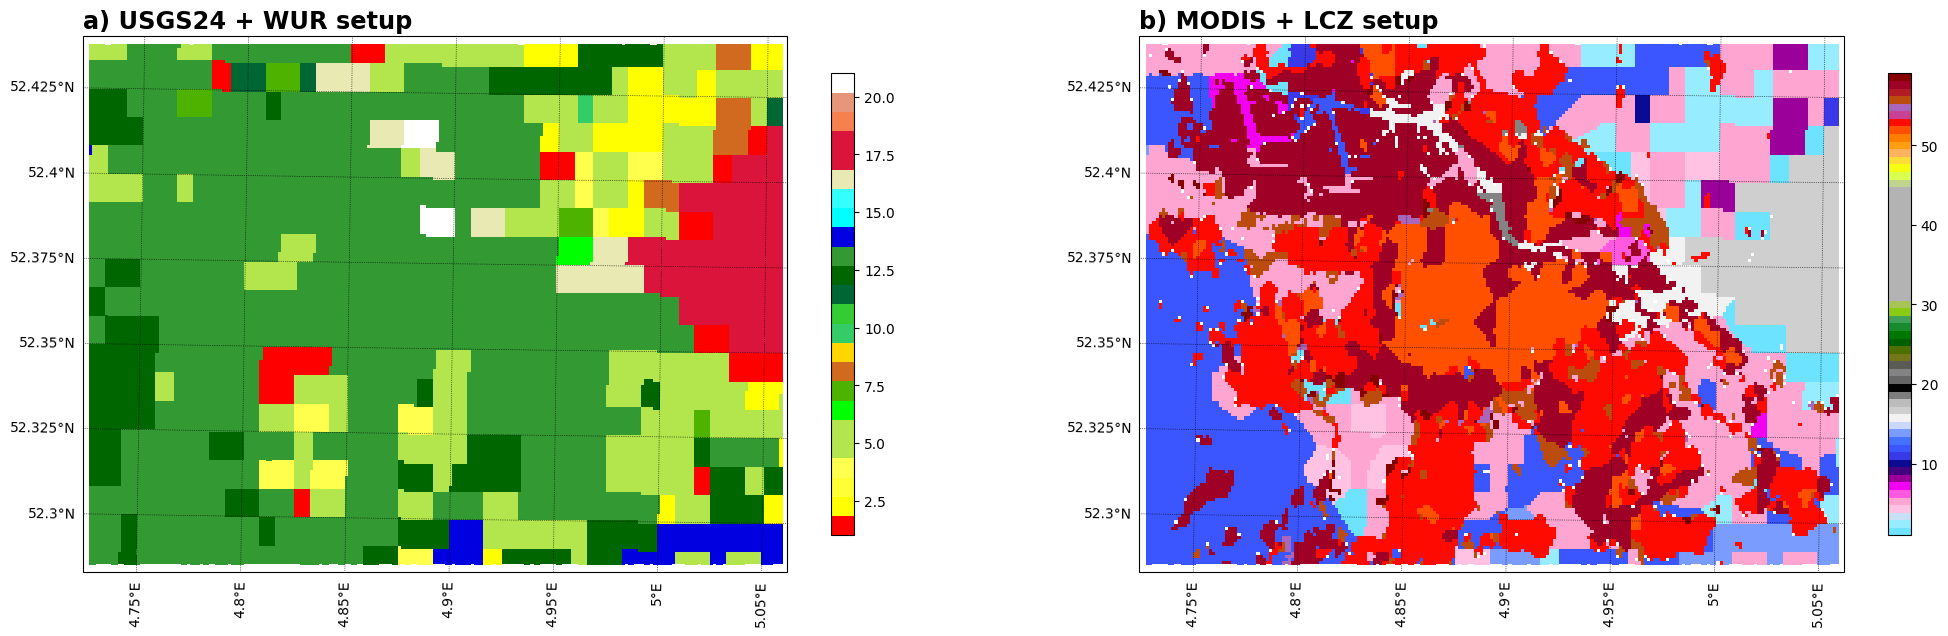

In [50]:
ax_options = {
    'color': 'black',
    'linestyle': 'dotted',
    'linewidth': 0.5,
    'zorder': 103,
    'draw_labels': True,
    'x_inline': False,
    'y_inline': False,
}
title_options = {
    'loc': 'left',
    'fontsize': 'xx-large',
    'fontweight': 'bold',
}
extent = [np.min(lon), np.max(lon), np.min(lat), np.max(lat)]

fig = plt.figure(figsize=(25, 10))
ax1 = fig.add_subplot(1, 2, 1, projection=cart_proj)
ax1.coastlines(linewidth=0.4, zorder=102, resolution='10m')
gl1 = ax1.gridlines(**ax_options)
gl1.right_labels = False
gl1.top_labels = False
ax1.set_extent(extent)
ct1 = ax1.pcolormesh(
    lon, lat, usgs_var, cmap=cmap, transform=ccrs.PlateCarree()
)
ax1.set_title('a) USGS24 + WUR setup', **title_options)
cbar1 = fig.colorbar(ct1, ax=ax1, shrink=0.6)

ax2 = fig.add_subplot(1, 2, 2, projection=cart_proj)
ax2.coastlines(linewidth=0.4, zorder=102, resolution='10m')
gl2 = ax2.gridlines(**ax_options)
gl2.right_labels = False
gl2.top_labels = False
ax2.set_extent(extent)
ct2 = ax2.pcolormesh(
    lon, lat, modis_var, cmap=cmap2, transform=ccrs.PlateCarree()
)
ax2.set_title('b) MODIS + LCZ setup', **title_options)
cbar2 = fig.colorbar(ct2, ax=ax2, shrink=0.6)